# <center> __M1 Info, Algorithmes et traitement de données__ </center>
# <center> __T.P. k-Means__ </center>
# <center> *Anthony Martinez, Calvin Massonnet* </center>

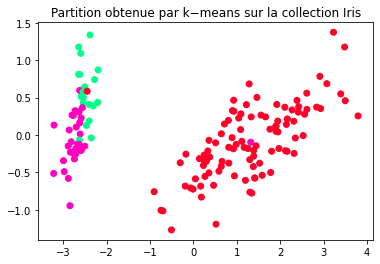

Information mutuelle normalisée : 0.6506724208907056


In [4]:
#@title Algorithme des k-Moyennes
import random
import time
import matplotlib.pyplot as plt
from sklearn.datasets import load_iris
from sklearn.decomposition import PCA
from sklearn.metrics.cluster import normalized_mutual_info_score as NMI

dataset = load_iris()
X = dataset.data
y = dataset.target

# Visualisation des clusters
def kMeansPlot(A):
  # Projection des donnees dans le plan par PCA
  pca = PCA(n_components = 2)
  # 'X' apres application de la PCA
  x_r = pca.fit(X).transform(X)
  plt.scatter(x_r[:,0], x_r[:,1], c=A, cmap='gist_rainbow')
  plt.title('Partition obtenue par k−means sur la collection Iris')
  plt.show()

# Trouver le centroïde le plus proche de x[i]
def argmin(x, Cl):
  minSum = -1
  for i in range(len(Cl)):
    sum = 0
    for j in range(len(x)):
      sum += abs((x[j] - Cl[i][j]))
    if minSum == -1 or sum < minSum:
      minSum = sum
      a = i
  return a

def stabilite(C, nbClusters):
  result = 0
  for i in range(len(C[0])):
    for k in range(len(C[0][i])):
      result += abs(C[1][i][k] - C[0][i][k])
  return result / nbClusters

# Entrée :
#   - precision : la précision pour le critère
#   - nbClusters : le nombre de clusters à obtenir 'k'
#   - X : l'ensemble des données X avec 'n' le nombre total de données
def k_means(precision, nbClusters, X):
  # Initialisation
  C = [0] * 2
  C[0] = random.sample(X, nbClusters)
  C[1] = random.sample(X, nbClusters)
  l = 0
  n = len(X)
  A = [0] * n
  S = [0] * nbClusters
  while True:
    # Mise-à-jour de l’appartenance de chaque donnée à un cluster
    for i in range(n):
      # Trouver le centroïde le plus proche de 'x[i]'
      A[i] = argmin(X[i], C[0])
    
    # Mise-à-jour des centroïdes par la moyenne des données des clusters
    for j in range(nbClusters):
      S[j] = []
      for i in range(len(A)):
        if A[i] == j:
          # Données assignées au cluster 'j'
          S[j].append(i)
      sum = [0] * len(X[0])
      for i in S[j]:
        for k in range(len(X[0])):
          sum[k] += X[i][k]
      for k in range(len(X[0])):
        # Centroïde = moyenne de ces données
        if len(S[j]) == 0:
          C[1][j][k] = 0
        else :
          C[1][j][k] = sum[k] / len(S[j])
    l += 1

    # Stabilité des centroïdes
    if stabilite(C, nbClusters) < precision:
      break
    else :
      for i in range(len(C[0])):
        for j in range(len(C[0][i])):
          C[0][i][j] = C[1][i][j]

  return A

A = k_means(1, 3, list(X))
kMeansPlot(A)
nmi = NMI(A, y)

print("Information mutuelle normalisée : " + str(nmi))

### **Q.** Lancez plusieurs fois votre implémentation des k-Moyennes avec le même k et visualisez le résultat. Que constatez-vous ? Comment expliquez-vous ce phénomène ?

**A.** Nous pouvons constater qu'en utilisant le même k sur plusieurs lancements de notre implémentation des k-Moyennes que le résultat est différent pour chaque lancement. Ce phénomène est expliquer par le fait que la première instance des centroïdes est obtenue aléatoirement.
Nous pouvons également noter que, comme échangé en cours, le même phénomène aurait été observé si le regroupement des données aurait été demandé à un groupe de personne, le regroupement d'objet par classe étant souvent laissé sujet à l'interprétation.

### **Q.** Lancez plusieurs fois votre implémentation des k-Moyennes avec le même k et noter la NMI obtenue. Est-ce que le résultat obtenu est cohérent avec votre observation précédente ?

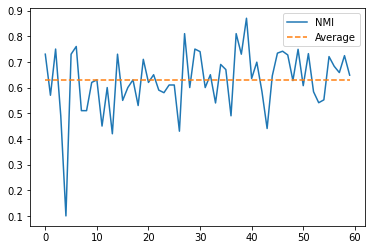

Moyenne des NMI : 0.6282314433389435


In [6]:
#@title Moyenne des informations mutuelles normalisées
import numpy as np
import matplotlib.pyplot as plt

# Plusieurs NMI ont été calculées est insérer en dur dans le tableau 'y_nmi'
y_nmi = [0.73, 0.57, 0.75, 0.49, 0.10, 0.73, 0.76, 0.51, 0.51, 0.62, 
         0.63, 0.45, 0.60, 0.42, 0.73, 0.55, 0.60, 0.63, 0.53, 0.71, 
         0.62, 0.65, 0.59, 0.58, 0.61, 0.61, 0.43, 0.81, 0.60, 0.75, 
         0.74, 0.60, 0.65, 0.54, 0.69, 0.67, 0.49, 0.81, 0.73, 0.87]

# ######################################### #
# Ajout de valeurs NMI supplémentaires.     #
#                                           #
# Peut parfois prendre trop de temps (>1s). #
# Ré-essayer, baisser le range ou mettre    #
# à 0 la condition.                         #
if 1:
  for i in range(20):
    dataset = load_iris()
    X = dataset.data
    y = dataset.target
    A = k_means(1, 3, list(X))
    nmi = NMI(A, y)
    y_nmi.append(nmi)

x = [x for x in range(len(y_nmi))]
average = [np.mean(y_nmi)] * len(x)

plt.plot(x, y_nmi, label='NMI')
plt.plot(x, average, label='Average', linestyle='--')
plt.legend(loc='best')
plt.show()

print("Moyenne des NMI : " + str(average[0]))

**A.** Le résultat obtenu est cohérent avec notre précédente observation car les informations mutuelles normalisées (NMI) changent à chaque lancement de l'algorithme des k-Moyennes.
Après avoir collecté plusieurs résultats NMI, nous en avons fait la moyennes et pouvons conclure que l'algorithme des k-Moyennes est loin d'être opimale comparé à la sortie attendue, avec une mpyenne NMI ~60%.